<a href="https://colab.research.google.com/github/e-dania/linear_regression_model/blob/master/summative/linear_regression/multivariate(Emmanuel_Dania).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Alll Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import joblib

# Load The Dataset


In [29]:
url = 'https://raw.githubusercontent.com/e-dania/linear_regression_model/refs/heads/master/summative/linear_regression/mission_launches.csv'  # Upload to Google Drive or share a public link from GitHub or similar
df = pd.read_csv(url)
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


# General Summary of The Dataset

In [33]:
df.describe()

,Unnamed: 0.1,Unnamed: 0
count,4324.000000,4324.000000
mean,2161.500000,2161.500000
std,1248.375611,1248.375611
min,0.000000,0.000000
25%,1080.750000,1080.750000
50%,2161.500000,2161.500000
75%,3242.250000,3242.250000
max,4323.000000,4323.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


# Initial Cleaning of the data
Columns unnamed and unnamed 0.1 are irrelevant to the data set and would therefore be dropped

In [36]:
df = df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


# Feauture Engineering
Some columns would need to be adjusted so that our data can be well represented:
### Extracting Year from Date
### Extracting Country from Location
I am doing this so the model would be more accurate


In [37]:
df["Year"] = pd.to_datetime(df["Date"], errors='coerce').dt.year
df["Country"] = df["Location"].apply(lambda x: x.split(",")[-1].strip())


Still under feauture engineering, if we take a look at the price column we can see that majority of the data for price is missing

In [42]:
print("Missing values:", df["Price"].isna().sum())
print("Non-missing values:", df["Price"].count())

Missing values: 3360
Non-missing values: 964


Given that i have majority of my data (78%) missing price, instead of dropping the rows, I have chosen instead to fill the missing rows with the median price.

I also created a new column called price_missing_flag and linked it to those rows with missing prices to give my model more information

The prices values are denoted with commas so before i work on them, I need to make them numeric

In [43]:
df["Price"] = pd.to_numeric(df["Price"], errors='coerce')
df["Price_missing_flag"] = df["Price"].isna().astype(int)
df["Price"] = df["Price"].fillna(df["Price"].median())

## Categorical Encoding
Now im encoding the categorical data because the model cant understand  strings so i used a label encoder to convert those strings to numbers for the model to better understand

In [44]:
le = LabelEncoder()
df["Organisation_encoded"] = le.fit_transform(df["Organisation"])
df["Rocket_Status_encoded"] = le.fit_transform(df["Rocket_Status"])
df["Mission_Status_encoded"] = le.fit_transform(df["Mission_Status"])
df["Country_encoded"] = le.fit_transform(df["Country"])

## Standardizing the data
I am standardizing the data so that my model assumes all the numbers have the same weight or scale and does not allow rows with high values to outweigh the others

In [45]:
scaler = StandardScaler()
df["Price_scaled"] = scaler.fit_transform(df[["Price"]])
df["Year_scaled"] = scaler.fit_transform(df[["Year"]])

#Visualizations

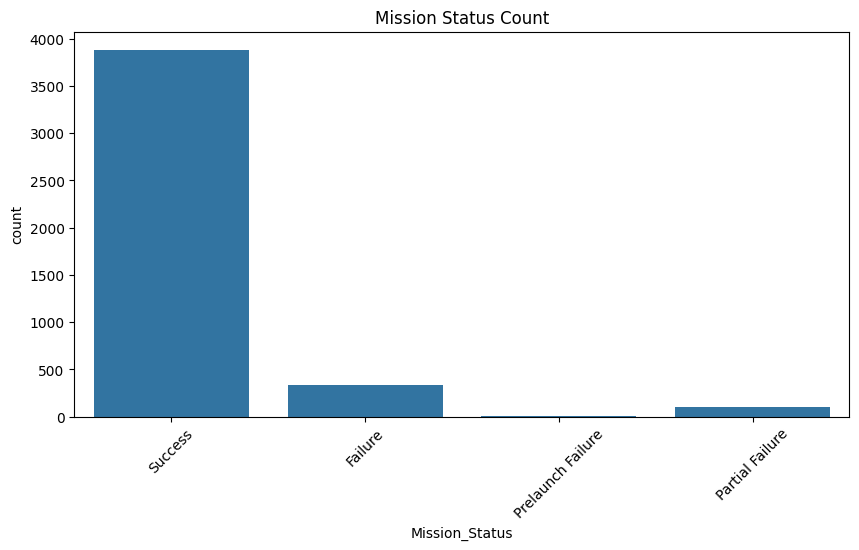

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(x='Mission_Status', data=df)
plt.title("Mission Status Count")
plt.xticks(rotation=45)
plt.show()

Majority of Sattelite missions are actually successful

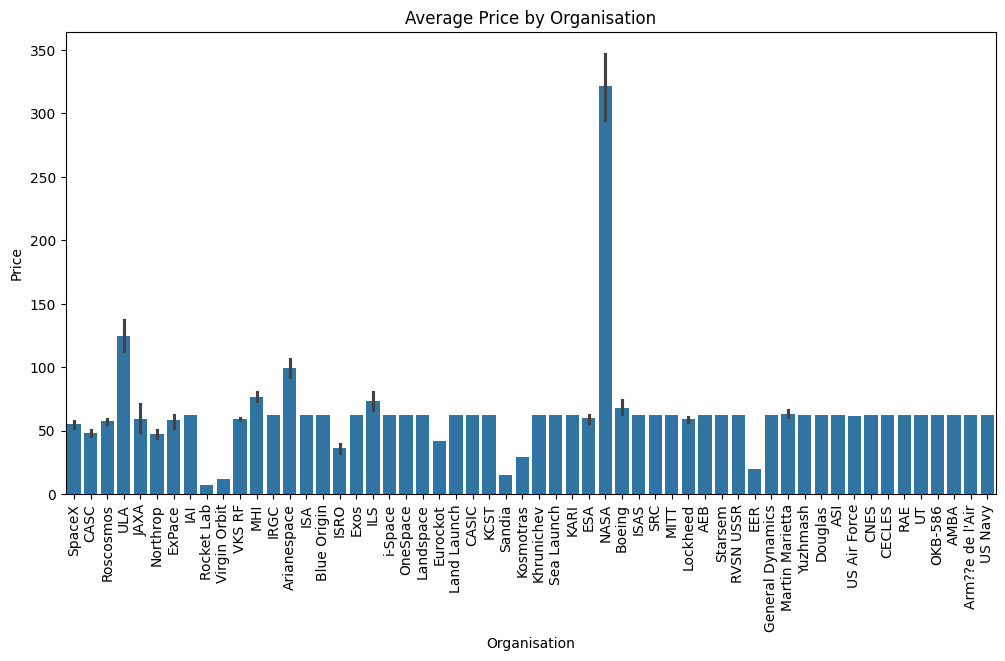

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Organisation", y="Price", estimator=np.mean)
plt.xticks(rotation=90)
plt.title("Average Price by Organisation")
plt.show()

This shows that large government agencies (NASA, ULA) likely have more complex and expensive missions, including deep space or Mars-related launches, while private companies (Rocket Lab, Virgin Orbit)focus on cheaper, frequent satellite launches.

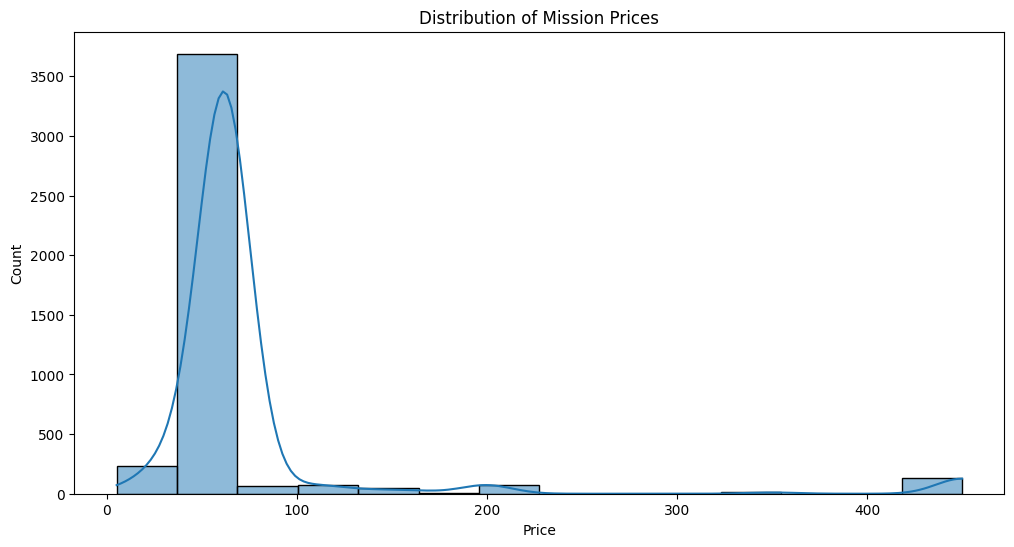

In [48]:
plt.figure(figsize=(12,6))
sns.histplot(df["Price"], kde=True)
plt.title("Distribution of Mission Prices")
plt.show()

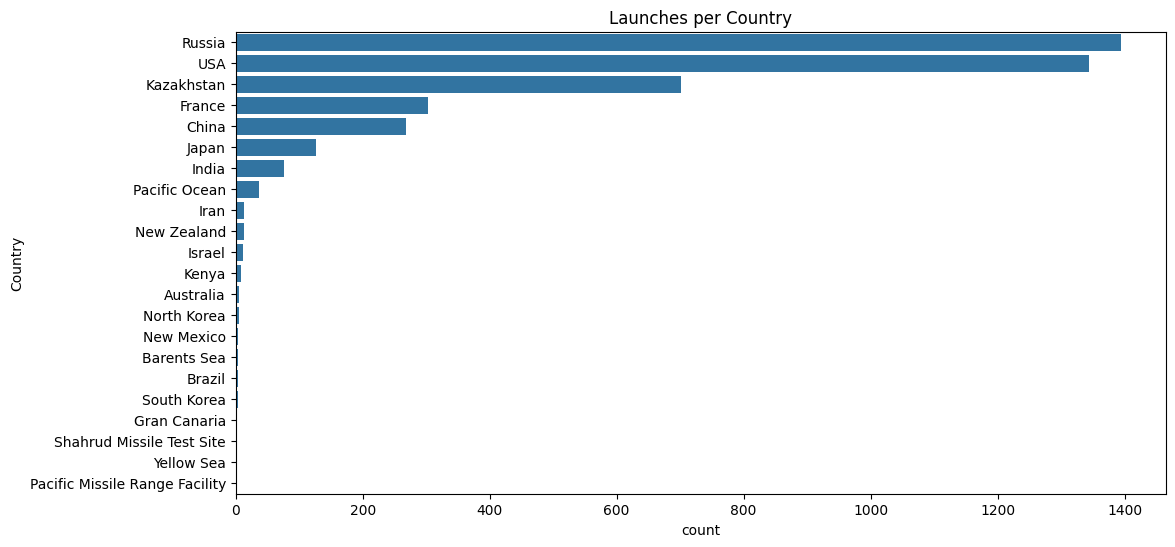

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(y="Country", data=df, order=df["Country"].value_counts().index)
plt.title("Launches per Country")
plt.show()

In [ ]:
df_numeric = df.select_dtypes(include=np.number)

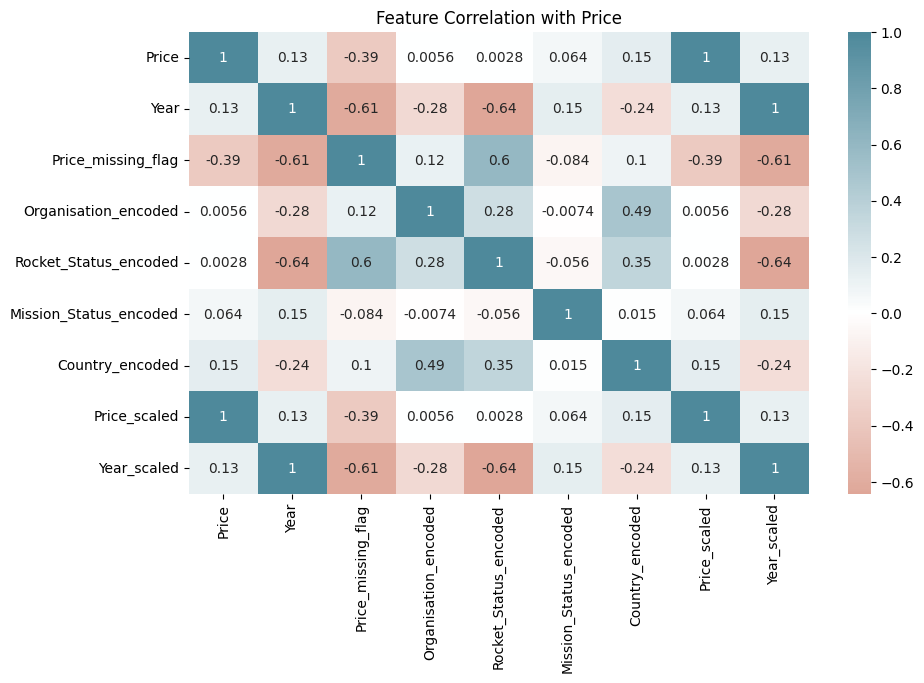

In [71]:
colors = ['#cd7660', '#ffffff', '#4e899b']
custom_cmap = LinearSegmentedColormap.from_list("custom_heatmap", colors)
plt.figure(figsize=(10,6))
df_numeric = df.select_dtypes(include=np.number)
correlation = df_numeric.corr()
sns.heatmap(correlation, cmap=custom_cmap, center=0, annot=True)
plt.title("Feature Correlation with Price")
plt.show()

# Machine Learning Model

In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Organisation            4324 non-null   object 
 1   Location                4324 non-null   object 
 2   Date                    4324 non-null   object 
 3   Detail                  4324 non-null   object 
 4   Rocket_Status           4324 non-null   object 
 5   Price                   4324 non-null   float64
 6   Mission_Status          4324 non-null   object 
 7   Year                    4198 non-null   float64
 8   Country                 4324 non-null   object 
 9   Price_missing_flag      4324 non-null   int64  
 10  Organisation_encoded    4324 non-null   int64  
 11  Rocket_Status_encoded   4324 non-null   int64  
 12  Mission_Status_encoded  4324 non-null   int64  
 13  Country_encoded         4324 non-null   int64  
 14  Price_scaled            4324 non-null   

We had some missing values in year so i also filled that in with the median value

In [51]:
df["Year"] = df["Year"].fillna(df["Year"].median())
df["Year_scaled"] = scaler.fit_transform(df[["Year"]])

## Define features and target

In [54]:
features = ["Year_scaled", "Organisation_encoded", "Rocket_Status_encoded",
            "Mission_Status_encoded", "Country_encoded"]
X = df[features]
y = df["Price"]

## Split between Test and Train

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initialize Model

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predict

In [57]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## Evaluate

In [58]:
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R^2 Score:", r2_score(y_test, y_test_pred))

Train RMSE: 72.47645336549198
Test RMSE: 61.89872793186772
R^2 Score: 0.012210226194666718


The initial linear regression model

## Loss Curves

Train RMSEs: [65.18355491 66.22214614 67.6199236  66.57234904 66.13462624 66.6549022
 67.93368852 68.43127592 69.41699797 70.32037975]
Test RMSEs: [72.03220222 71.71008914 71.71368644 71.73552207 71.76816637 71.76632004
 71.82138189 71.89522412 71.97807687 71.93715301]


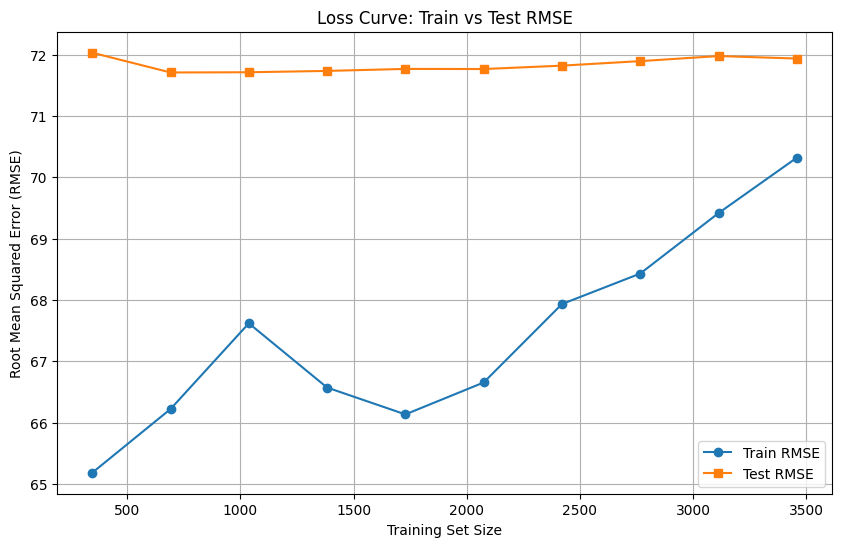

In [64]:
X = df[features]
y = df["Price"]

train_sizes, train_scores, test_scores = learning_curve(
    LinearRegression(), X, y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',
    shuffle=True,
    random_state=42
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
test_rmse = np.sqrt(-test_scores.mean(axis=1))

print("Train RMSEs:", train_rmse)
print("Test RMSEs:", test_rmse)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_rmse, label="Train RMSE", marker='o')
plt.plot(train_sizes, test_rmse, label="Test RMSE", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Loss Curve: Train vs Test RMSE")
plt.legend()
plt.grid(True)
plt.show()


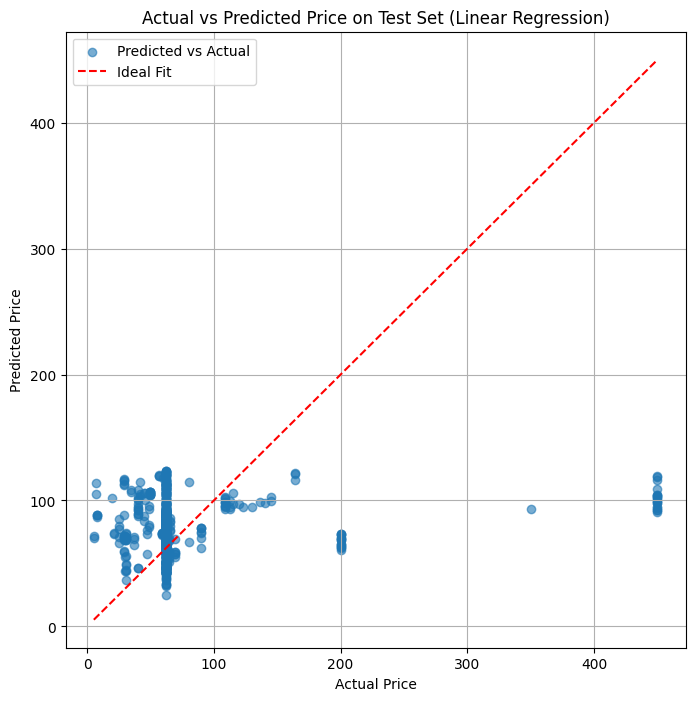

In [72]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_test_pred, alpha=0.6, label='Predicted vs Actual')

# Plot the perfect prediction line y = x
min_price = min(y_test.min(), y_test_pred.min())
max_price = max(y_test.max(), y_test_pred.max())
plt.plot([min_price, max_price], [min_price, max_price], 'r--', label='Ideal Fit')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price on Test Set (Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()

# Comparison
## Random Forest Model

In [73]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

print("Random Forest Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_rf)))
print("Random Forest Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_rf)))
print("Random Forest R^2 Score:", r2_score(y_test, y_test_pred_rf))


Random Forest Train RMSE: 15.706805981246799
Random Forest Test RMSE: 18.275238372549257
Random Forest R^2 Score: 0.9138952364462235


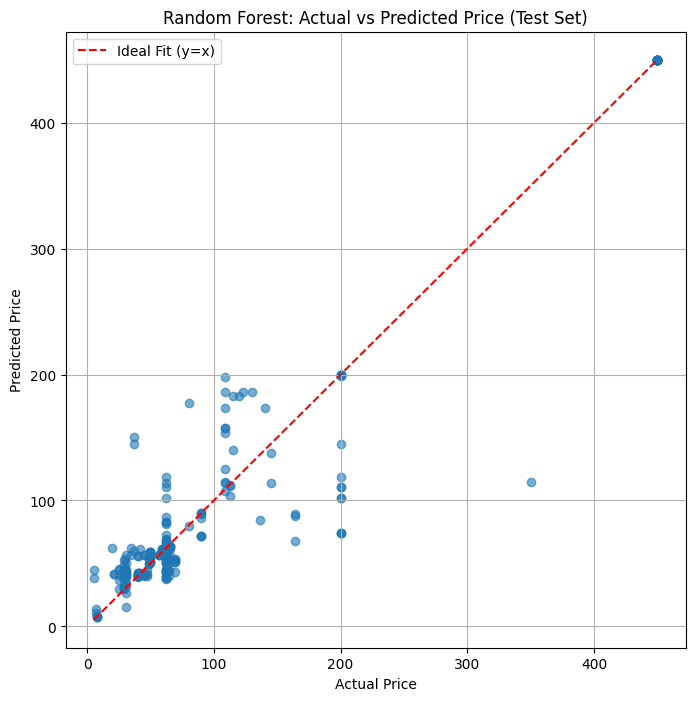

In [25]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_test_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit (y=x)')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price on Test Set (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()

##Decision Tree Model

In [74]:

dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)


y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)


print("Decision Tree Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_dt)))
print("Decision Tree Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_dt)))
print("Decision Tree R^2 Score:", r2_score(y_test, y_test_pred_dt))


Decision Tree Train RMSE: 18.463857336277638
Decision Tree Test RMSE: 17.17922747472987
Decision Tree R^2 Score: 0.9239133718418403


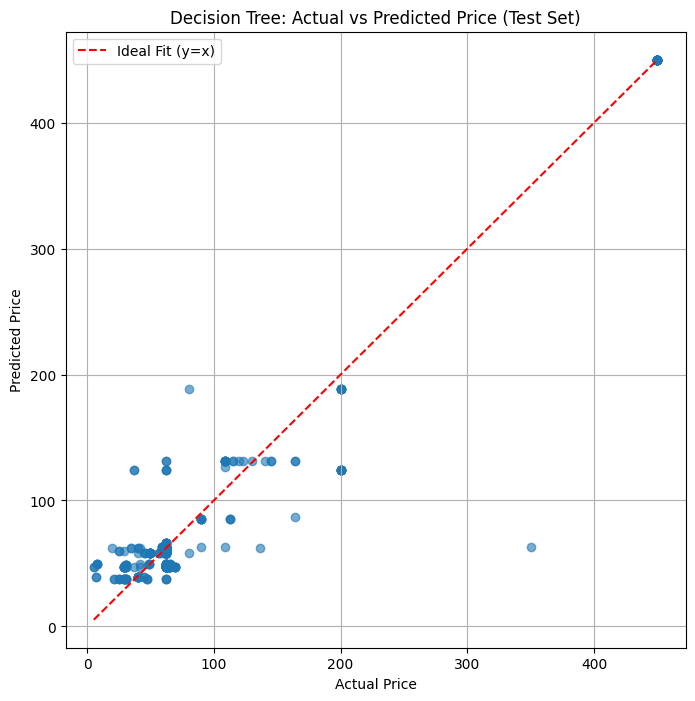

In [75]:

plt.figure(figsize=(8,8))
plt.scatter(y_test, y_test_pred_dt, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit (y=x)')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree: Actual vs Predicted Price (Test Set)")
plt.legend()
plt.grid(True)
plt.show()


##Looking at all the models, it is safe to say that the decision tree was the best. It had the highest R^2 score of 0.924 and the lowest test RMSE of 17.18

# Packaging the model

im using a pipeline so that i dont need to preprocess any of the data i want to feed it

In [76]:
pipeline = Pipeline([
    ("model", DecisionTreeRegressor(random_state=42, max_depth=5))
])

pipeline.fit(X_train, y_train)

y_test_pred = pipeline.predict(X_test)
print("Pipeline Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Pipeline R² Score:", r2_score(y_test, y_test_pred))

joblib.dump(pipeline, "decision_tree_pipeline.pkl")

Pipeline Test RMSE: 17.17922747472987
Pipeline R² Score: 0.9239133718418403


['decision_tree_pipeline.pkl']